In [6]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#load dataset
fashion_data=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

4423680/4422102 [==============================] - 87s 20us/step


Image Label: 0


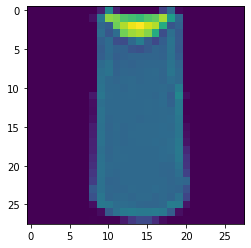

In [21]:
#View a training image
img_index = 2 # <<<<<  You can update this value to look at other images
img = train_images[img_index]
print("Image Label: " + str(train_labels[img_index]))#label
plt.imshow(img)

In [23]:
#print the shape
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
#neural network model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [31]:
#Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
#Train the model
model.fit(train_images,train_labels,epochs=5,batch_size=32)


Epoch 1/5
60000/60000 [==============================] - 10s 159us/sample - loss: 12.9031 - acc: 0.1994
Epoch 2/5
60000/60000 [==============================] - 7s 123us/sample - loss: 12.9028 - acc: 0.1995
Epoch 3/5
60000/60000 [==============================] - 8s 132us/sample - loss: 12.3082 - acc: 0.2362
Epoch 4/5
60000/60000 [==============================] - 8s 125us/sample - loss: 12.1139 - acc: 0.2484
Epoch 5/5
60000/60000 [==============================] - 7s 125us/sample - loss: 12.0531 - acc: 0.2521


In [33]:
#evaluate the model
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 80us/sample - loss: 12.1837 - acc: 0.2441


[12.18366876220703, 0.2441]

In [36]:
#Make a prediction
predictions = model.predict(test_images[:5])
#Print the predicted labels
print(np.argmax(predictions, axis=1))
#Print the actual labels
print(test_labels[:5])

[7 1 1 1 1]
[9 2 1 1 6]


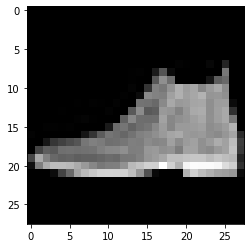

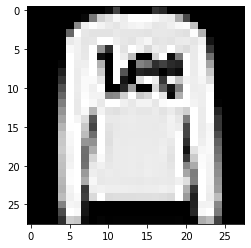

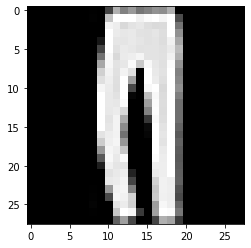

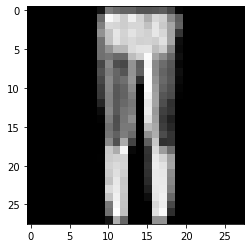

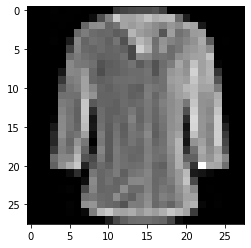

In [37]:
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()